In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

## 1.  Linear Regression

*Linear regression* attempts to model the relationship between two variables ($x$ and $y$) by fitting a linear equation $y = \theta_1 x+\theta_0$ to observed data.

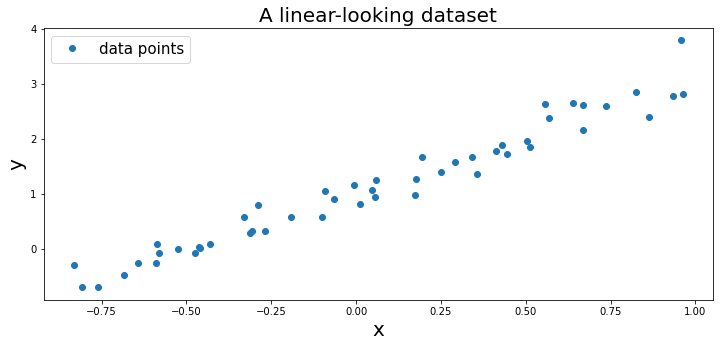

In [13]:
'This cell generates (and plots) a linear-looking dataset, based on the equation y=2x+1'

# generate the dataset
m = 50 # number of points
x = -1 + 2*np.random.rand(m,1) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m,1) # y = 2x+1 + random noise

# plot the dataset
plt.figure(figsize=(12,5)) # figure size
plt.plot(x,y,'o', label='data points') # plot the data
plt.xlabel('x',fontsize=20) # set x-axis label
plt.ylabel('y',fontsize=20) # set y-axis label
plt.title('A linear-looking dataset',fontsize=20) # set title
plt.legend(fontsize=15) # plot legend

The plot shows that the two variables $x$ and $y$ are roughly correlated: the larger $x$ is, the larger $y$ is.
We can quantify this by attempting to fit a linear model

$$
y = \theta_1 x+\theta_0,
$$

where $\theta_0$ is the bias (intercept) and $\theta_1$ is the slope.

In order to find a good linear model for our data, we need a measure of how well (or poorly) a model fits the data.
The most common performance measure is the **Root Mean Squared Error** (MSE):

$$
\mathrm{MSE} = \sqrt{ \frac{1}{m}\sum_{i=1}^m\left(y_i - (\theta_1 x_i+\theta_0) \right)^2}
$$


In [14]:
# import the linear regression model from the sci-kit learn library
from sklearn.linear_model import LinearRegression

In [15]:
# instantiate the model
reg = LinearRegression()

In [16]:
# fit the linear regression model to the data
reg.fit(x,y)

LinearRegression()

## 2. Polynomial Regression

## 3. Multivariate Linear Regression

### Form of Linear Regression

A linear model assumes that there is a linear relation between the variable $y$ and the features $x_i$

$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$,

where:

$y$ is the response 

$\theta_0$ is the **bias** (aka the intercept)

$\theta_1$ is the **coefficient** for $x_1$ (the first feature)

$\theta_2$ is the **coefficient** for $x_2$ (the second feature)

$\vdots$

$\theta_n$ is the **coefficient** for $x_n$ (the nth feature)

The model coefficients $\theta_i$ are "learned" during the model fitting step using the "least squares" criterion. 
Then, the fitted model can be used to make predictions!

### Training a linear model

To train a linear model, one needs to find the model coefficients $\theta_i$ that minimize the **Root Mean Square Error (RMSE)**

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\widehat{y}_i- y_i\right)^2}
$$

where the $y_i$ values are the actual values of the response variable, and the $\hat{y}_i$ values are the predicted values

### Example: Sales Prediction

In [ ]:
# load the data
url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
sales = pd.read_csv(url, index_col=0)
sales.head()

What are the **features**?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
    
What is the **response**?

- **Sales**: sales of a single product in a given market (in thousands of items)

### Visualize the relationship between the features and the response

A scatterplot can help determine if two variables are related in some systematic way.

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(sales['TV'],sales['Sales'],'o')
plt.xlabel('TV', fontsize=20)
plt.ylabel('Sales', fontsize=20)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(sales['Radio'],sales['Sales'],'o')
plt.xlabel('Radio', fontsize=20)
plt.ylabel('Sales', fontsize=20)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(sales['Newspaper'],sales['Sales'],'o')
plt.xlabel('Newspaper', fontsize=20)
plt.ylabel('Sales', fontsize=20)

**Goal:** Train a linear model which predicts sales based on the money spent on different platforms for marketing.

$y = \theta_0 + \theta_1 \times \mathrm{TV} + \theta_2 \times \mathrm{Radio} + \theta_3 \times \mathrm{Newspaper}$

### Linear Regression in scikit-learn

In [ ]:
# feature matrix X / target vector y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = sales[feature_cols]
y = sales.Sales

In [ ]:
# train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression

# initialize
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

### Interpreting linear regression coefficients

In [ ]:
# coefficients
print(linreg.coef_)

In [ ]:
# pair the feature names with the coefficients
coeffs = pd.DataFrame(linreg.coef_, feature_cols, columns=['coefficient'])
coeffs

In [ ]:
coeffs.plot(kind='bar')

In [ ]:
# bias term
linreg.intercept_

How do we interpret the TV coefficient (0.0461)?

- For a given amount of Radio and Newspaper ad spending, a "unit" (1000 dollars) increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.

### Making predictions

In [ ]:
y_test_pred = linreg.predict(X_test)
y_test_pred

### Model evaluation 

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

where

- $n$ is the size of the dataset
- $\hat{y}_i$ is the prediction for $y_i$

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

On average, the predictions are off by 2000 dollars.

### Visualize the prediction (only for small datasets)

In [ ]:
# plot predicted values against observed values
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('actual')
plt.ylabel('predicted')

In [ ]:
# plot the first 30 predictions
plt.figure(figsize=(12,7))
plt.plot(y_test[:30].to_numpy(),'b-.o', label='observed sales')
plt.plot(y_test_pred[:30],'r-.o', label='predicted sales')
plt.ylabel('sales',fontsize=20)
plt.legend(fontsize=20)

### Adding polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=3,include_bias=False)),
    ('reg', linreg)
])

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
# original features
feature_cols

In [ ]:
# polynomial features
poly_features_names = pipe['poly_features'].get_feature_names(feature_cols)
poly_features_names

In [ ]:
# pair the feature names with the coefficients
coeffs = pd.DataFrame(pipe['reg'].coef_,poly_features_names, columns=['coefficient'])
coeffs 

In [ ]:
coeffs.plot(kind='bar')

In [ ]:
y_test_pred = pipe.predict(X_test)

In [ ]:
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('actual')
plt.ylabel('predicted')

In [ ]:
mean_squared_error(y_test, y_test_pred)

In [ ]:
# plot the first 30 predictions
plt.figure(figsize=(12,7))
plt.plot(y_test[:30].to_numpy(),'b-.o', label='observed sales')
plt.plot(y_test_pred[:30],'r-.o', label='predicted sales')
plt.ylabel('sales',fontsize=20)
plt.legend(fontsize=20)